[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
[-5.0, -2.5, -1.6666666666666667, -1.25, -1.0, -0.8333333333333334, -0.7142857142857143, -0.625, -0.5555555555555556, -0.5, -0.45454545454545453, -0.4166666666666667, -0.38461538461538464, -0.35714285714285715, -0.3333333333333333, -0.3125, -0.29411764705882354, -0.2777777777777778, -0.2631578947368421, -0.25, -0.23809523809523808, -0.22727272727272727, -0.21739130434782608, -0.20833333333333334, -0.2, -0.19230769230769232, -0.18518518518518517, -0.17857142857142858, -0.1724137931034483, -0.16666666666

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\juanl\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\juanl\AppData\Local\Temp\ipykernel_6108\824274306.py", line 20, in leer_variables
    objeto_Mruv.frm_acceleration()
  File "d:\JUAN\PROYECTO_CAF_CLON\PROYECTO_MRUV_CAF_PY\Clase_mruv.py", line 49, in frm_acceleration
    if self.tiempo!=0:
       ^^^^^^^^^^^
AttributeError: 'MRUV' object has no attribute 'tiempo'


El nombre :prueba3 ya existe elija otro nombre


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\juanl\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\juanl\AppData\Local\Temp\ipykernel_6108\824274306.py", line 20, in leer_variables
    objeto_Mruv.frm_acceleration()
  File "d:\JUAN\PROYECTO_CAF_CLON\PROYECTO_MRUV_CAF_PY\Clase_mruv.py", line 49, in frm_acceleration
    if self.tiempo!=0:
       ^^^^^^^^^^^
AttributeError: 'MRUV' object has no attribute 'tiempo'


[1, 2, 3, 4]
[-5.0, -2.5, -1.6666666666666667, -1.25]
[1, 2, 3, 4]
[0.0, 2.5, 3.333333333333333, 3.75]
[1, 2, 3, 4]
[4.375, 7.5, 9.375, 10.0]
   Tiempo  distancia  acceleration  velocidad   objeto objetodistancia
0       1      4.375     -5.000000   0.000000  prueba4                
1       2      7.500     -2.500000   2.500000  prueba4                
2       3      9.375     -1.666667   3.333333  prueba4                
3       4     10.000     -1.250000   3.750000  prueba4                
prueba4.xlsx


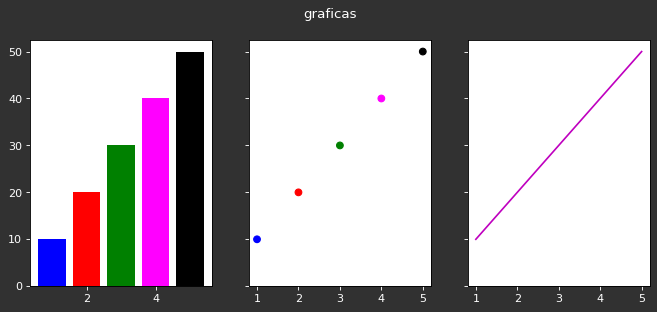

In [8]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import Clase_mruv as mruv
import os


def leer_variables():   
    nombre = et_nombre.get() 
    velocidad_inicial = et_Velocidad_Ini.get() if len(et_Velocidad_Ini.get()) != 0 else 0
    velocidad_final = et_Velocidad_fin.get() if len(et_Velocidad_fin.get()) != 0 else 0
    tiempo =et_Tiempo.get() if len(et_Tiempo.get()) != 0 else 0
    posicion_final = et_Posicion_fin.get() if len(et_Posicion_fin.get()) != 0 else 0
    aceleracion = et_Aceleracion.get() if len(et_Aceleracion.get()) != 0 else 0

    
    objeto_Mruv=mruv.MRUV(nombre,float(posicion_final),float(aceleracion),float(velocidad_inicial),float(velocidad_final),float(tiempo))
    objeto_Mruv.frm_acceleration()
    objeto_Mruv.frm_tiempo()
    objeto_Mruv.listar_tiempo()
    objeto_Mruv.guardar_datos_aceleracion()
    objeto_Mruv.guardar_datos_velocidad()
    objeto_Mruv.guardar_datos_distancia()
    objeto_Mruv.unir_datos()
    archivo=objeto_Mruv.info_archivo()
    print(archivo)

    completar_tabla(archivo)


def completar_tabla(archivo):
    df = pd.read_excel(archivo, 'Hoja 1')
    treeview_data.clear()  # Limpiar la lista existente
    
    # Actualizar los datos en treeview_data
    for _, row in df.iterrows():
        tiempo = row['Tiempo']
        distancia = row['distancia']
        acceleration = row['acceleration']
        velocidad = row['velocidad']
        objeto = row['objeto']
        objetodistancia = row['objetodistancia']
        
        treeview_data.append({
            'Tiempo': tiempo,
            'distancia': distancia,
            'acceleration': acceleration,
            'velocidad': velocidad,
            'objeto': objeto,
            'objetodistancia': objetodistancia
        })
    
    # Insertar los datos en el Treeview
    insertar_datos_treeview()


def insertar_datos_treeview():
    # Limpiar los elementos existentes en el Treeview
    treeview.delete(*treeview.get_children())
    
    # Insertar los nuevos datos en el Treeview
    for i, dato in enumerate(treeview_data):
        iid = i + 1  # Identificador único del elemento
        tiempo = dato['Tiempo']
        distancia = dato['distancia']
        acceleration = dato['acceleration']
        velocidad = dato['velocidad']
        objeto = dato['objeto']
        objetodistancia = dato['objetodistancia']
        
        # Insertar el elemento en el Treeview
        treeview.insert(parent="", index="end", iid=iid, text=str(tiempo),
                        values=(distancia, acceleration, velocidad, objeto, objetodistancia))




ventana = tk.Tk()
ventana.title("Ingreso de Variables")
ventana.geometry('1200x600')


#responsive
ventana.columnconfigure(index=0, weight=1)
ventana.columnconfigure(index=1, weight=1)
ventana.columnconfigure(index=2, weight=1)
ventana.rowconfigure(index=0, weight=1)
ventana.rowconfigure(index=1, weight=1)
ventana.rowconfigure(index=2, weight=1)

# Creando estilo con plantilla
style = ttk.Style(ventana)

# Importando
ventana.tk.call("source", "forest-dark.tcl")

# Set the theme with the theme_use method
style.theme_use("forest-dark")

#creando frame1
style = ttk.Style()
style.configure("Titulo.TLabelframe.Label", foreground="#217346")


frame1 = ttk.LabelFrame(ventana, text="Ingresar inputs", padding=(20, 10) )#,style="Titulo.TLabelframe")
frame1.grid(row=0, column=0, padx=(20, 10), pady=(20, 10), sticky="nsew")


# Labels and inputs :)

# Etiquetas
#--Label=lb
#--Entry=et
# Etiquetas

#creando label and input de frame1

lb_nombre = tk.Label(frame1, text="Ingrese un nombre:")
lb_nombre.grid(row=0, column=0, padx=5, pady=0, sticky="nsew")
et_nombre = ttk.Entry(frame1)
et_nombre.grid(row=1, column=0, padx=5, pady=(0, 10), sticky="ew")


lb_Velocidad_Ini = tk.Label(frame1, text="Ingrese la velocidad inicial:")
lb_Velocidad_Ini.grid(row=2, column=0, padx=5, pady=0, sticky="nsew")
et_Velocidad_Ini = ttk.Entry(frame1)
et_Velocidad_Ini.grid(row=3, column=0, padx=5, pady=(0, 10), sticky="ew")


lb_Velocidad_fin = tk.Label(frame1, text="Ingrese la velocidad final:")
lb_Velocidad_fin.grid(row=4, column=0, padx=5, pady=0, sticky="nsew")
et_Velocidad_fin = ttk.Entry(frame1)
et_Velocidad_fin.grid(row=5, column=0, padx=5, pady=(0, 10), sticky="ew")


lb_Tiempo = tk.Label(frame1, text="Ingrese el tiempo:")
lb_Tiempo.grid(row=6, column=0, padx=5, pady=0, sticky="nsew")
et_Tiempo = ttk.Entry(frame1)
et_Tiempo.grid(row=7, column=0, padx=10, pady=5)


lb_Posicion_fin = tk.Label(frame1, text="Ingrese la posición final:")
lb_Posicion_fin.grid(row=8, column=0, sticky="w")
et_Posicion_fin = ttk.Entry(frame1)
et_Posicion_fin.grid(row=9, column=0, padx=10, pady=5)


lb_Aceleracion = tk.Label(frame1, text="Ingrese la aceleración:")
lb_Aceleracion.grid(row=10, column=0, sticky="w")
et_Aceleracion = ttk.Entry(frame1)
et_Aceleracion.grid(row=11, column=0, padx=10, pady=5)


# # Botón para imprimir las variables
# Togglebutton
button = ttk.Button(frame1,  text="Guardar", command=leer_variables, style="ToggleButton")
button.grid(row=12, column=0, padx=5, pady=10, sticky="nsew")

#################################
#creando tabla para mostrar
frame2=ttk.LabelFrame(ventana, padding=(20, 10))
frame2.grid(row=0, column=1, padx=(20, 10), pady=(20, 10),  sticky="nsew")


# Crear el Treeview
treeview_frame = ttk.Frame(frame2)
treeview_frame.grid(row=0, column=1, padx=1, pady=1, sticky="nsew")

# Scrollbar
treeview_scroll = ttk.Scrollbar(treeview_frame)
treeview_scroll.pack(side="right", fill="y")

# Treeview
treeview = ttk.Treeview(treeview_frame, selectmode="extended", yscrollcommand=treeview_scroll.set, columns=(1,2,3,4,5), height=6)
treeview.pack(expand=True, fill="both")
treeview_scroll.config(command=treeview.yview)


# Treeview columns
treeview.column("#0", width=120)
treeview.column(1, anchor="w", width=120)
treeview.column(2, anchor="w", width=120)
treeview.column(3, anchor="w", width=120)
treeview.column(4, anchor="w", width=120)
treeview.column(5, anchor="w", width=120)

# Treeview headings
treeview.heading("#0", text="Tiempo", anchor="center")
treeview.heading(1, text="distancia", anchor="center")
treeview.heading(2, text="acceleration", anchor="center")
treeview.heading(3, text="velocidad", anchor="center")
treeview.heading(4, text="objeto", anchor="center")
treeview.heading(5, text="objetodistancia", anchor="center")


# Datos de los diccionarios
treeview_data = [{'Tiempo': None,
                  'distancia': None,
                  'acceleration': None,
                  'velocidad': None,
                  'objeto': None,
                  'objetodistancia': None}]

# # Define treeview data
# df=pd.read_excel('Carrito2.xlsx','Hoja 1')
# treeview_data=df.to_dict(orient='records')


# Insertar datos en el Treeview
for i, dato in enumerate(treeview_data):
    iid = i + 1  # Identificador único del elemento
    tiempo = dato['Tiempo']
    distancia = dato['distancia']
    acceleration = dato['acceleration']
    velocidad = dato['velocidad']
    objeto = dato['objeto']
    objetodistancia = dato['objetodistancia']
    
    # Insertar el elemento en el Treeview
    treeview.insert(parent="", index="end", iid=iid, text=str(tiempo),
                    values=(distancia, acceleration, velocidad, objeto, objetodistancia))


# Select and scroll
if len(treeview_data)>1:
    treeview.selection_set(1)
    treeview.see(1)

######################################

#creando frame1
grafics_frame = ttk.LabelFrame(frame2, text="Graficos", padding=(20, 10))
grafics_frame.grid(row=1, column=1, padx=(1,10), pady=1, sticky="nsew")


tiempo=[1,2,3,4,5]
colores=['blue','red','green','magenta','black']
distancia=[10,20,30,40,50]

fig,axs=plt.subplots(1,3,dpi=80,figsize=(10,4) ,sharey=True,facecolor='#313131')
fig.suptitle('graficas',color='white')

axs[0].bar(tiempo,distancia,color=colores)
axs[0].tick_params(axis='x', colors='white')  # Cambiar color de las etiquetas del eje x
axs[0].tick_params(axis='y', colors='white')  # Cambiar color de las etiquetas del eje y


axs[1].scatter(tiempo,distancia,color=colores)
axs[1].tick_params(axis='x', colors='white')  # Cambiar color de las etiquetas del eje x
axs[1].tick_params(axis='y', colors='white')  # Cambiar color de las etiquetas del eje y

axs[2].plot(tiempo,distancia,color='m')
axs[2].tick_params(axis='x', colors='white')  # Cambiar color de las etiquetas del eje x
axs[2].tick_params(axis='y', colors='white')  # Cambiar color de las etiquetas del eje y


canvas=FigureCanvasTkAgg(fig,master=grafics_frame)
canvas.draw()
canvas.get_tk_widget().grid(column=0,row=0,rowspan=3)


ventana.mainloop()


##313131


In [6]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import Clase_mruv as mruv
import os


nombre = 'carrito1'
velocidad_inicial = 5
velocidad_final = 0
tiempo =0
posicion_final = 500
aceleracion =  0


objeto_Mruv=mruv.MRUV(nombre,float(posicion_final),float(aceleracion),float(velocidad_inicial),float(velocidad_final),float(tiempo))
objeto_Mruv.frm_acceleration()
objeto_Mruv.frm_tiempo()
objeto_Mruv.listar_tiempo()
objeto_Mruv.guardar_datos_aceleracion()
objeto_Mruv.guardar_datos_velocidad()
objeto_Mruv.guardar_datos_distancia()
objeto_Mruv.unir_datos()
archivo=objeto_Mruv.info_archivo()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
[-5.0, -2.5, -1.6666666666666667, -1.25, -1.0, -0.8333333333333334, -0.7142857142857143, -0.625, -0.5555555

In [73]:
len(treeview_data)>1


False

In [105]:
import pandas as pd


df=pd.read_excel('Carrito2.xlsx','Hoja 1')
df2=df.to_dict(orient='records')
df2

[{'Tiempo': 1,
  'distancia': 27.5,
  'acceleration': -20.0,
  'velocidad': 10.0,
  'objeto': 'Carrito2',
  'objetodistancia': nan},
 {'Tiempo': 2,
  'distancia': 50.0,
  'acceleration': -10.0,
  'velocidad': 20.0,
  'objeto': 'Carrito2',
  'objetodistancia': nan},
 {'Tiempo': 3,
  'distancia': 67.5,
  'acceleration': -6.666666666666667,
  'velocidad': 23.33333333333333,
  'objeto': 'Carrito2',
  'objetodistancia': nan},
 {'Tiempo': 4,
  'distancia': 80.0,
  'acceleration': -5.0,
  'velocidad': 25.0,
  'objeto': 'Carrito2',
  'objetodistancia': nan}]

In [53]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

def imprimir_variables():
    nombre = et_nombre.get()
    velocidad_inicial = et_Velocidad_Ini.get()
    velocidad_final = et_Velocidad_fin.get()
    tiempo = et_Tiempo.get()
    posicion_final = et_Posicion_fin.get()
    aceleracion = et_Aceleracion.get()

    print("Nombre:", nombre)
    print("Velocidad Inicial:", velocidad_inicial)
    print("Velocidad Final:", velocidad_final)
    print("Tiempo:", tiempo)
    print("Posición Final:", posicion_final)
    print("Aceleración:", aceleracion)

ventana = tk.Tk()
ventana.title("Ingreso de Variables")
ventana.geometry('800x500')

# Responsive
for i in range(3):
    ventana.columnconfigure(i, weight=1)
for i in range(4):
    ventana.rowconfigure(i, weight=1)

# Crear el Treeview
treeview_frame = ttk.Frame(ventana)
treeview_frame.grid(row=0, column=2, padx=(25, 10), pady=(25, 10), sticky="nsew")

# Scrollbar
treeview_scroll = ttk.Scrollbar(treeview_frame)
treeview_scroll.pack(side="right", fill="y")

# Treeview
treeview = ttk.Treeview(treeview_frame, selectmode="extended", yscrollcommand=treeview_scroll.set,
                        columns=("distancia", "acceleration", "velocidad", "objeto", "objetodistancia"), height=12)
treeview.pack(expand=True, fill="both")
treeview_scroll.config(command=treeview.yview)

# Configurar columnas del Treeview
treeview.column("#0", width=120, anchor="center")
treeview.column("distancia", width=120, anchor="center")
treeview.column("acceleration", width=120, anchor="center")
treeview.column("velocidad", width=120, anchor="center")
treeview.column("objeto", width=120, anchor="center")
treeview.column("objetodistancia", width=120, anchor="center")

# Configurar encabezados de las columnas del Treeview
treeview.heading("#0", text="Tiempo", anchor="center")
treeview.heading("distancia", text="Distancia", anchor="center")
treeview.heading("acceleration", text="Aceleración", anchor="center")
treeview.heading("velocidad", text="Velocidad", anchor="center")
treeview.heading("objeto", text="Objeto", anchor="center")
treeview.heading("objetodistancia", text="Objeto Distancia", anchor="center")

# Frame para ingresar los inputs
frame1 = ttk.LabelFrame(ventana, text="Ingresar inputs", padding=(20, 10))
frame1.grid(row=0, column=0, padx=(20, 10), pady=(20, 10), sticky="nsew")

# Labels e inputs
lb_nombre = tk.Label(frame1, text="Ingrese un nombre:")
lb_nombre.grid(row=0, column=0, padx=5, pady=5, sticky="w")
et_nombre = ttk.Entry(frame1)
et_nombre.grid(row=1, column=0, padx=5, pady=5, sticky="ew")

lb_Velocidad_Ini = tk.Label(frame1, text="Ingrese la velocidad inicial:")
lb_Velocidad_Ini.grid(row=2, column=0, padx=5, pady=5, sticky="w")
et_Velocidad_Ini = ttk.Entry(frame1)
et_Velocidad_Ini.grid(row=3, column=0, padx=5, pady=5, sticky="ew")

lb_Velocidad_fin = tk.Label(frame1, text="Ingrese la velocidad final:")
lb_Velocidad_fin.grid(row=4, column=0, padx=5, pady=5, sticky="w")
et_Velocidad_fin = ttk.Entry(frame1)
et_Velocidad_fin.grid(row=5, column=0, padx=5, pady=5, sticky="ew")

lb_Tiempo = tk.Label(frame1, text="Ingrese el tiempo:")
lb_Tiempo.grid(row=6, column=0, padx=5, pady=5, sticky="w")
et_Tiempo = ttk.Entry(frame1)
et_Tiempo.grid(row=7, column=0, padx=10, pady=5)

lb_Posicion_fin = tk.Label(frame1, text="Ingrese la posición final:")
lb_Posicion_fin.grid(row=8, column=0, padx=5, pady=5, sticky="w")
et_Posicion_fin = ttk.Entry(frame1)
et_Posicion_fin.grid(row=9, column=0, padx=10, pady=5)

lb_Aceleracion = tk.Label(frame1, text="Ingrese la aceleración:")
lb_Aceleracion.grid(row=10, column=0, padx=5, pady=5, sticky="w")
et_Aceleracion = ttk.Entry(frame1)
et_Aceleracion.grid(row=11, column=0, padx=10, pady=5)

# Botón para imprimir las variables
btn_imprimir = tk.Button(frame1, text="Imprimir Variables", command=imprimir_variables)
btn_imprimir.grid(row=12, column=0, padx=10, pady=10)

# Cargar datos del archivo Excel en el Treeview
df = pd.read_excel('Carrito2.xlsx', 'Hoja 1')
treeview_data = df.to_dict(orient='records')

# Insertar datos en el Treeview
for i, dato in enumerate(treeview_data):
    iid = i + 1  # Identificador único del elemento
    tiempo = dato['Tiempo']
    distancia = dato['distancia']
    acceleration = dato['acceleration']
    velocidad = dato['velocidad']
    objeto = dato['objeto']
    objetodistancia = dato['objetodistancia']

    # Insertar el elemento en el Treeview
    treeview.insert(parent="", index="end", iid=iid, text=str(tiempo),
                    values=(distancia, acceleration, velocidad, objeto, objetodistancia))

ventana.mainloop()


Nombre: 
Velocidad Inicial: 
Velocidad Final: 
Tiempo: 
Posición Final: 
Aceleración: 
Nombre: 
Velocidad Inicial: 
Velocidad Final: 
Tiempo: 
Posición Final: 
Aceleración: 
Nombre: 
Velocidad Inicial: 
Velocidad Final: 
Tiempo: 
Posición Final: 
Aceleración: 
Nombre: 
Velocidad Inicial: 
Velocidad Final: 
Tiempo: 
Posición Final: 
Aceleración: 
Nombre: 
Velocidad Inicial: 
Velocidad Final: 
Tiempo: 
Posición Final: 
Aceleración: 
Nombre: 
Velocidad Inicial: 
Velocidad Final: 
Tiempo: 
Posición Final: 
Aceleración: 
Nombre: 
Velocidad Inicial: 
Velocidad Final: 
Tiempo: 
Posición Final: 
Aceleración: 


In [108]:
from tkinter import *
root=Tk()
root.title("Ventana")
root.geometry("400x400")


#stringvar "variables"

nombre=StringVar()
apellido=StringVar()

nombre.set("Escribe aqui tu nombre")

apellido.set("Escribe aqui tu apellido")#para completar el campo texto .set

def saludar():
    print("Hola"+nombre.get()+" "+apellido.get())#.get para tomar los valores que ingresa

etiqueta1=Label(root,text="Escribe aquí tu nombre:") #lo que va ir
etiqueta1.place(x=10 , y=10)#mostrarlo en la pantalla
entrada1=Entry(root,textvariable=nombre)
entrada1.place(x=170,y=10)


etiqueta2=Label(root,text="Escribe aquí tu apellido:") #lo que va ir
etiqueta2.place(x=10 , y=40)#mostrarlo en la pantalla
entrada2=Entry(root,textvariable=apellido)
entrada2.place(x=170,y=40)

boton=Button(root,text="saludar ahora",command=saludar)
boton.place(x=10,y=100)



root.mainloop()

In [60]:
import tkinter as tk

ventana = tk.Tk()
ventana.title("Ejemplo de Frames con diferentes tamaños")

# Crear el primer Frame con tamaño personalizado
frame1 = tk.Frame(ventana, width=200, height=150, borderwidth=2, relief="solid")
frame1.pack(side="left", padx=10, pady=10)

label1 = tk.Label(frame1, text="Contenido del Frame 1")
label1.pack()

# Crear el segundo Frame con otro tamaño personalizado
frame2 = tk.Frame(ventana, width=300, height=100, borderwidth=2, relief="solid")
frame2.pack(side="right", padx=10, pady=10)

label2 = tk.Label(frame2, text="Contenido del Frame 2")
label2.pack()

ventana.mainloop()
